Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [52]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 6000
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left


Task 1


In [53]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[ 0.69164751  1.94768304  2.831332   ... -0.02841527 -1.14499029
 -4.3017169 ]


In [54]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = sample.min()
max_smpl = sample.max()
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 14
Длина интервала: 1.5355232286663438
Максимальный: 10.159388451619655
Минимальный элемент: -11.337936749709158 


In [55]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -11.337936749709158 - -9.802413521042814
2 interval: -9.802413521042814 - -8.26689029237647
3 interval: -8.26689029237647 - -6.731367063710127
4 interval: -6.731367063710127 - -5.1958438350437826
5 interval: -5.1958438350437826 - -3.6603206063774385
6 interval: -3.6603206063774385 - -2.1247973777110953
7 interval: -2.1247973777110953 - -0.5892741490447513
8 interval: -0.5892741490447513 - 0.9462490796215928
9 interval: 0.9462490796215928 - 2.481772308287937
10 interval: 2.481772308287937 - 4.017295536954281
11 interval: 4.017295536954281 - 5.552818765620625
12 interval: 5.552818765620625 - 7.088341994286967
13 interval: 7.088341994286967 - 8.623865222953313
14 interval: 8.623865222953313 - 10.159388451619655


In [56]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')



1 interval: 5
2 interval: 8
3 interval: 56
4 interval: 173
5 interval: 446
6 interval: 772
7 interval: 1108
8 interval: 1196
9 interval: 1031
10 interval: 658
11 interval: 362
12 interval: 139
13 interval: 38
14 interval: 8

Сумма частот - 0.9999999999999999


14
[-11.33793675  -9.80241352  -8.26689029  -6.73136706  -5.19584384
  -3.66032061  -2.12479738  -0.58927415   0.94624908   2.48177231
   4.01729554   5.55281877   7.08834199   8.62386522  10.15938845]
14
[-11.337936749709158, -9.802413521042814, -8.26689029237647, -6.731367063710127, -5.1958438350437826, -3.6603206063774385, -2.1247973777110953, -0.5892741490447513, 0.9462490796215928, 2.481772308287937, 4.017295536954281, 5.552818765620625, 7.088341994286967, 8.623865222953313, 10.159388451619655]


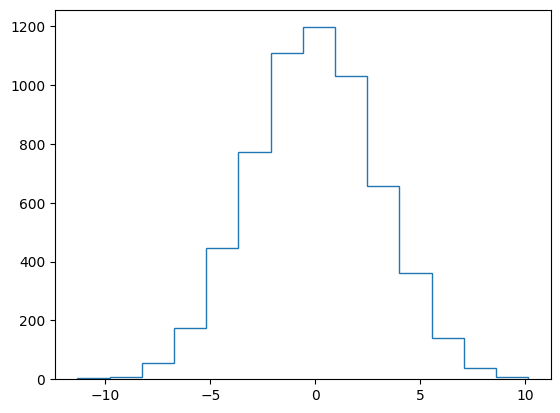

In [57]:
counts, bins = np.histogram(sample, bins='sturges')
plt.stairs(counts, bins)
print(len(counts))
print(bins)

print((len(frequency)))
print(intervals)

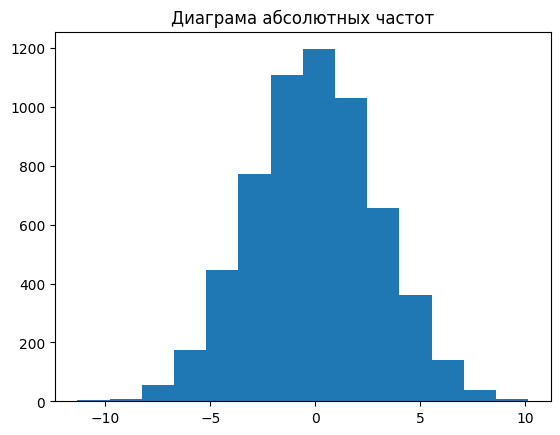

In [58]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [59]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.0005427031762047083
2 interval: 0.0008683250819275333
3 interval: 0.006078275573492733
4 interval: 0.018777529896682906
5 interval: 0.04840912331745998
6 interval: 0.08379337040600696
7 interval: 0.12026302384696336
8 interval: 0.12981459974816623
9 interval: 0.11190539493341085
10 interval: 0.07141973798853961
11 interval: 0.03929170995722088
12 interval: 0.01508714829849089
13 interval: 0.004124544139155783
14 interval: 0.0008683250819275333


[0.0005427  0.00086833 0.00607828 0.01877753 0.04840912 0.08379337
 0.12026302 0.1298146  0.11190539 0.07141974 0.03929171 0.01508715
 0.00412454 0.00086833]
0.65124381144565


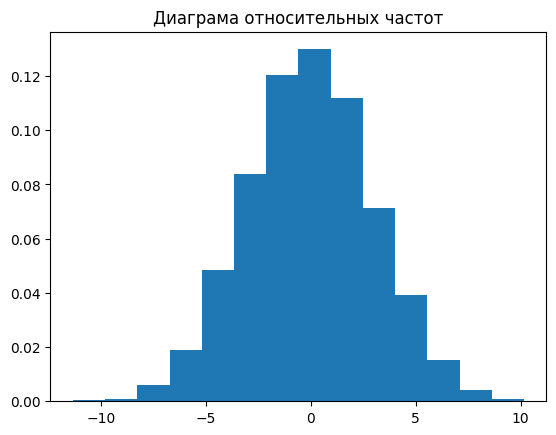

In [60]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

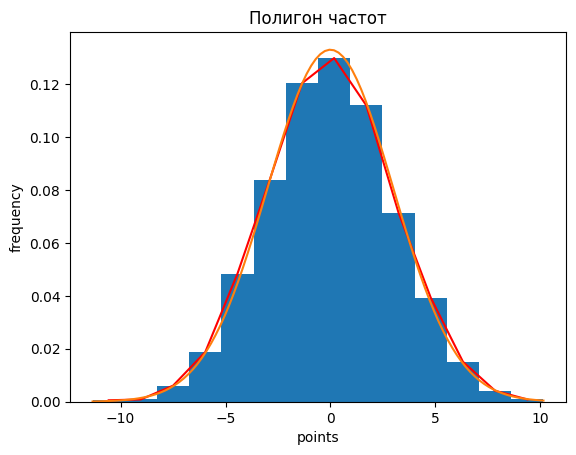

In [61]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [62]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)


Сумма площадей под графиком:  1.0000000000000002


Function graph

In [63]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


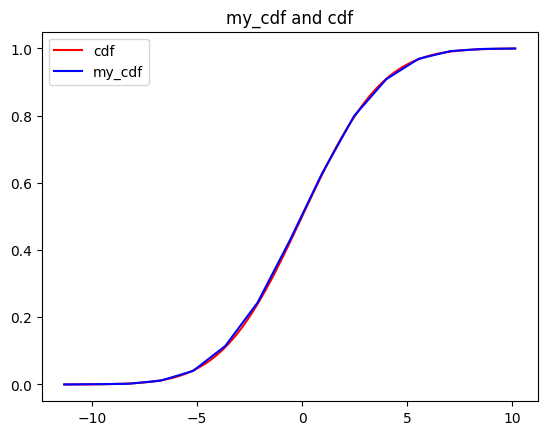

In [64]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------


x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-2.075367
0.50,-0.056914
0.75,1.977856


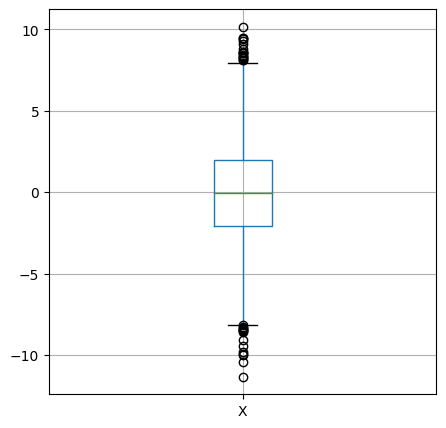

In [65]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [66]:
print(q)
print(f"Вероятность по таблице {0.4599*2}")
print(f"Вероятность по lib {sts.norm().cdf(q)-sts.norm().cdf(-q)}")

prob = 0
for i in sample:
    if i > a - (q*sigma) and i < a+(q*sigma):
        prob += 1
prob /= n
print(f"Статистическая {prob}")

1.75
Вероятность по таблице 0.9198
Вероятность по lib 0.9198816862723658
Статистическая 0.9221666666666667


part 4

In [67]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - -0.041225884039365626, 
variacne - 8.929723556022976, 
dev - 2.9882643049139705, 
Skewness - 0.005449781118627404, 
Kurtosis - -0.10311986259282513


In [68]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: -0.041225884039365626
Эмпирическая дисперсия: 8.928235268763649
Стандартное отклонение: 2.98801527251178
S^2: 8.929723556022985
Коэффициент ассимметрии: 0.0054497811186274055
Коэффициент эксцесса: -0.10311986259282735
